# Исследование надёжности заёмщиков

Заказчик — кредитный отдел банка. Нужно разобраться, влияет ли семейное положение и количество детей клиента на факт погашения кредита в срок. Входные данные от банка — статистика о платёжеспособности клиентов.

Результаты исследования будут учтены при построении модели **кредитного скоринга** — специальной системы, которая оценивает способность потенциального заёмщика вернуть кредит банку.

In [105]:
import pandas as pd

## Шаг 1. Импорт данных и первичный анализ

Загружаем имеющиеся данные. Нужно провести общий анализ состава полей датасета и значений в каждой колонке, в т.ч на предмет анломаний и пропусков.

По итогу составляем общий список замечаний к исправлению (предобработке)

In [106]:
# Загружаем датасет
data = pd.read_csv('/datasets/data.csv')

In [107]:
# Изучаем общую инфу
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
children            21525 non-null int64
days_employed       19351 non-null float64
dob_years           21525 non-null int64
education           21525 non-null object
education_id        21525 non-null int64
family_status       21525 non-null object
family_status_id    21525 non-null int64
gender              21525 non-null object
income_type         21525 non-null object
debt                21525 non-null int64
total_income        19351 non-null float64
purpose             21525 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB


Описание полей
- children — количество детей в семье
- days_employed — общий трудовой стаж в днях
- dob_years — возраст клиента в годах
- education — уровень образования клиента
- education_id — идентификатор уровня образования
- family_status — семейное положение
- family_status_id — идентификатор семейного положения
- gender — пол клиента
- income_type — тип занятости
- debt — имел ли задолженность по возврату кредитов
- total_income — ежемесячный доход
- purpose — цель получения кредита

In [108]:
# Смотрим примеры значений
data.head(3)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья
1,1,-4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.014102,приобретение автомобиля
2,0,-5623.422610,33,Среднее,1,женат / замужем,0,M,сотрудник,0,145885.952297,покупка жилья


In [109]:
# Количество детей в семье - список значений
data['children'].unique()

array([ 1,  0,  3,  2, -1,  4, 20,  5])

In [110]:
# общий трудовой стаж в днях (общая информация)
data['days_employed'].describe()

count     19351.000000
mean      63046.497661
std      140827.311974
min      -18388.949901
25%       -2747.423625
50%       -1203.369529
75%        -291.095954
max      401755.400475
Name: days_employed, dtype: float64

In [111]:
# Количество записей с незаполенным трудовым стажем
len(data[data['days_employed'].isna()])

2174

In [112]:
# Возраст клиента в годах (общая информация)
data['dob_years'].describe()

count    21525.000000
mean        43.293380
std         12.574584
min          0.000000
25%         33.000000
50%         42.000000
75%         53.000000
max         75.000000
Name: dob_years, dtype: float64

In [113]:
# Количество записей с 0 возрастом
len(data[data['dob_years'] == 0])

101

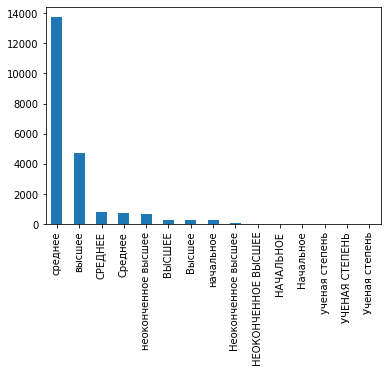

In [114]:
# уровень образования
data['education'].value_counts().plot.bar()

In [115]:
# идентифкатор уровня образования 
data['education_id'].unique()

array([0, 1, 2, 3, 4])

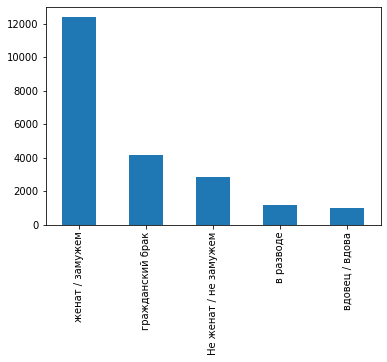

In [116]:
# Семейное положение
data['family_status'].value_counts().plot.bar()

In [117]:
# идентифкатор семейного статуса
data['family_status_id'].unique()

array([0, 1, 2, 3, 4])

Количество женщин заемщиков существенно превосходит количество мужчин


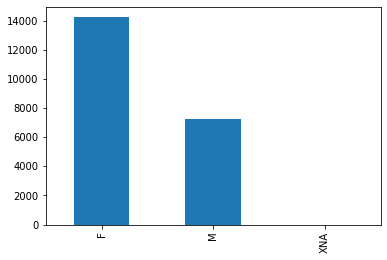

In [118]:
# Пол
data['gender'].value_counts().plot.bar()

print('Количество женщин заемщиков существенно превосходит количество мужчин')

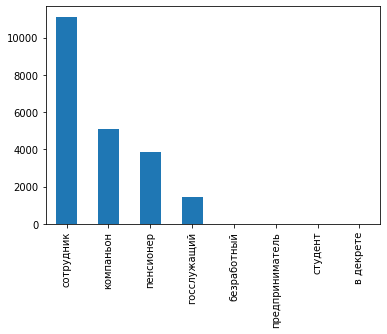

In [119]:
# Тип занятости
data['income_type'].value_counts().plot.bar()

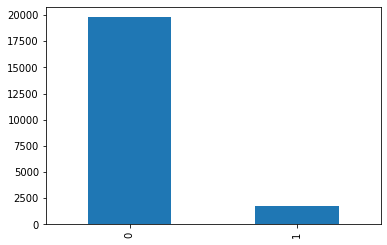

In [120]:
# Имел ли задолженность
data['debt'].value_counts().plot.bar()

In [121]:
# Ежемесячный доход
data['total_income'].describe()

count    1.935100e+04
mean     1.674223e+05
std      1.029716e+05
min      2.066726e+04
25%      1.030532e+05
50%      1.450179e+05
75%      2.034351e+05
max      2.265604e+06
Name: total_income, dtype: float64

In [122]:
# Количество не заполненных записей ежемесячного дохода
len(data[data['total_income'].isna()])

2174

In [123]:
# Цель получения кредита
data['purpose'].unique()

array(['покупка жилья', 'приобретение автомобиля',
       'дополнительное образование', 'сыграть свадьбу',
       'операции с жильем', 'образование', 'на проведение свадьбы',
       'покупка жилья для семьи', 'покупка недвижимости',
       'покупка коммерческой недвижимости', 'покупка жилой недвижимости',
       'строительство собственной недвижимости', 'недвижимость',
       'строительство недвижимости', 'на покупку подержанного автомобиля',
       'на покупку своего автомобиля',
       'операции с коммерческой недвижимостью',
       'строительство жилой недвижимости', 'жилье',
       'операции со своей недвижимостью', 'автомобили',
       'заняться образованием', 'сделка с подержанным автомобилем',
       'получение образования', 'автомобиль', 'свадьба',
       'получение дополнительного образования', 'покупка своего жилья',
       'операции с недвижимостью', 'получение высшего образования',
       'свой автомобиль', 'сделка с автомобилем',
       'профильное образование', 'высшее об

**Вывод**

В данных 12 полей. 

1. Есть пропуски в общем трудовом стаже в днях (days_employed - 2174 записей), ежемесячном доходе (total_income - 2174 записей). 
2. Почему-то, общий трудовой стаж в днях представлен типом float, хотя, по логике, должен быть целочислельный
3. Трудовой стаж отрицательный! Машину времени, вроде, пока еще не придумали. Может это количество дней до начала трудовой деятельности? :-) Скорее всего просто проблема порядка вычитания (что из чего вычиталось). 
4. Максимальный трудовой стаж - 1115 лет! Да он помнит еще Владимира Мономаха и Ивана Грозного :-) Скорее всего единицы измерения не дни, а более мелкие - например, часы
5. Количество детей в семье - есть отрицательное значение. Такого быть не может. Также смущают выбросы в 20 детей. При этом, нет ни одного значения 6,7 и т.д. детей
6. 101 запись имеет 0 возраст работника.
7. В уровне образования (названии) есть неявные дубли. Можно вынести в отдельную таблицу и оставить только id (нормализовать)
8. Семейный статус можно вынести в отдельную таблицу и оставить только id (нормализовать)
9. Пол человека содержит непонятное значение XNA
10. 2174 записи не имеют информации об ежемесячном доходе

## Шаг 2. Предобработка данных

Проводим обработку полученных данных с целью создания "чистого" источника информации.

- Проверяем количество пропусков в данных
- Если пропуски существенный, придумываем, чем их будем заполнять
- Если пропуски не существенны, удаляем их
- Проводим обработку некорректных данных
- Приводим к нужным типам
- Проводим явных удаление дублей

### Обработка пропусков

#### Трудовой стаж

Определяем долю пропусков. 
Если пропуски существенны, заменяем значения на медиану. 
Избавляемся от отрицательных значений.

In [124]:
#  Определяем долю пропусков
days_employed_isna_percent = (len(data[data['days_employed'].isna()]) / len(data)) * 100
print(f'Доля пропусков дней трудового стажа {days_employed_isna_percent}%')

Доля пропусков дней трудового стажа 10.099883855981417%


In [125]:
# Заменяем отрицательные значения на положительные
data['days_employed'] = data['days_employed'].apply('abs')

In [126]:
# Доля пропуски существенная, поэтому заменяем пропуски трудового стажа на медианное значение
data['days_employed'].fillna(data['days_employed'].median(), inplace=True)

In [127]:
# Проверяем, что пропусков не осталось
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
children            21525 non-null int64
days_employed       21525 non-null float64
dob_years           21525 non-null int64
education           21525 non-null object
education_id        21525 non-null int64
family_status       21525 non-null object
family_status_id    21525 non-null int64
gender              21525 non-null object
income_type         21525 non-null object
debt                21525 non-null int64
total_income        19351 non-null float64
purpose             21525 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB


In [128]:
# Оцениваем трудовой стаж от максмальных значений
data.sort_values('days_employed', ascending = False).head(5)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
6954,0,401755.400475,56,среднее,1,вдовец / вдова,2,F,пенсионер,0,176278.441171,ремонт жилью
10006,0,401715.811749,69,высшее,0,Не женат / не замужем,4,F,пенсионер,0,57390.256908,получение образования
7664,1,401675.093434,61,среднее,1,женат / замужем,0,F,пенсионер,0,126214.519212,операции с жильем
2156,0,401674.466633,60,среднее,1,женат / замужем,0,M,пенсионер,0,325395.724541,автомобили
7794,0,401663.850046,61,среднее,1,гражданский брак,1,F,пенсионер,0,48286.441362,свадьба


In [129]:
# Проверяем предположение, что трудовой стаж хранится в часах, т.к. очень большие значения. Насчитываем отдельную колонку года
data['years_employed'] = data['days_employed'] / 365

In [130]:
# Исходя из продолжительности жизни, трудовой стаж не может составлять более 80 лет
print('Количество записей трудового стажа более 80 лет', len(data[data['years_employed'] > 80]))

Количество записей трудового стажа более 80 лет 3445


In [131]:
# Все остальные записи, где трудовой стаж более 80 лет, переводим из часов в дни (делим на 24)
data['days_employed'] = data.apply(lambda row: row['days_employed'] / 24 if row['years_employed'] > 80 else row['days_employed'], axis=1)

# Пересчитываем года для консисентности
data['years_employed'] = data['days_employed'] / 365

In [132]:
# Проверяем
data['days_employed'].describe()

count    21525.000000
mean      4394.454537
std       5131.551830
min         24.141633
25%       1025.608174
50%       2194.220567
75%       4779.587738
max      18388.949901
Name: days_employed, dtype: float64

#### Ежемесячный доход

- Проверяем долю пропусков. 
- Заполняем пропуски медианой по типу занятости

In [137]:
#  Определяем долю пропусков
total_income_isna_percent = (len(data[data['total_income'].isna()]) / len(data)) * 100
print(f'Доля пропусков ежемесячного дохода {total_income_isna_percent}%')

Доля пропусков ежемесячного дохода 10.099883855981417%


In [140]:
# Заполняем медианой по типу занятости
for income_type in data['income_type'].unique():
    income_type_total_median = data[data['income_type'] == income_type]['total_income'].median()
    data.loc[(data['total_income'].isna()) & (data['income_type'] == income_type), 'total_income'] =  income_type_total_median

In [144]:
# Проверяем отсутсвие пропуска
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 13 columns):
children            21525 non-null int64
days_employed       21525 non-null float64
dob_years           21525 non-null int64
education           21525 non-null object
education_id        21525 non-null int64
family_status       21525 non-null object
family_status_id    21525 non-null int64
gender              21525 non-null object
income_type         21525 non-null object
debt                21525 non-null int64
total_income        21525 non-null float64
purpose             21525 non-null object
years_employed      21525 non-null float64
dtypes: float64(3), int64(5), object(5)
memory usage: 2.1+ MB


In [35]:
# Проверяем, что пропусков не осталось
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 13 columns):
children            21525 non-null int64
days_employed       21525 non-null float64
dob_years           21525 non-null int64
education           21525 non-null object
education_id        21525 non-null int64
family_status       21525 non-null object
family_status_id    21525 non-null int64
gender              21525 non-null object
income_type         21525 non-null object
debt                21525 non-null int64
total_income        21525 non-null float64
purpose             21525 non-null object
years_employed      21525 non-null float64
dtypes: float64(3), int64(5), object(5)
memory usage: 2.1+ MB


#### Количество детей в семье

In [36]:
# Значения
data['children'].unique()

array([ 1,  0,  3,  2, -1,  4, 20,  5])

In [37]:
print('Количество записей с отрицательным количеством детей', len(data[data['children'] < 0]), ', что составляет ', len(data[data['children'] < 0])/ len(data) * 100, '%')

Количество записей с отрицательным количеством детей 47 , что составляет  0.2183507549361208 %


In [38]:
# Просматриваем информацию о родителях с 20 детьми
print('Количество записей с 20 детьми', len(data[data['children'] == 20]), ', что составляет ', len(data[data['children'] == 20])/ len(data) * 100, '%')

Количество записей с 20 детьми 76 , что составляет  0.3530778164924506 %


In [149]:
# Для отрицательных значений берем модуль
data['children'] = data['children'].apply('abs')

In [150]:
# Для значений больше 20, сдвигаем знак (делаем 2 и т.д)
data['children'] = data['children'].apply(lambda c: c // 10 if c >=20 else c)

In [153]:
# Проверяем
data['children'].unique()

array([1, 0, 3, 2, 4, 5])

In [40]:
data['children'].describe()

count    21402.000000
mean         0.473180
std          0.751837
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          5.000000
Name: children, dtype: float64

#### Возраст работника

In [41]:
print('Количество записей с 0 возрастом работника', len(data[data['dob_years'] == 0]), ', что составляет ', len(data[data['dob_years'] == 0])/ len(data) * 100, '%')

Количество записей с 0 возрастом работника 100 , что составляет  0.4672460517708626 %


In [42]:
# Т.к. таких записей не много, можем удалить их
data = data[data['dob_years'] > 0]

In [43]:
data['dob_years'].describe()

count    21302.000000
mean        43.503474
std         12.252843
min         19.000000
25%         33.000000
50%         43.000000
75%         53.000000
max         75.000000
Name: dob_years, dtype: float64

#### Пол человека

In [44]:
# Проверяем нпонятно значение
data[data['gender'] == 'XNA']

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,years_employed
10701,0,2358.600502,24,неоконченное высшее,2,гражданский брак,1,XNA,компаньон,0,203905.157261,покупка недвижимости,6.461919


In [45]:
# Удаляем его
data = data[data['gender'] != 'XNA']

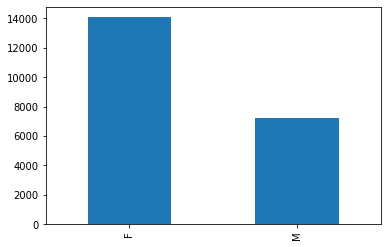

In [46]:
data['gender'].value_counts().plot.bar()

#### Уровень образования 

In [47]:
# Убираем расхождения регистра надписи уровнея образования. Все приводим к нижнему регистру
data['education'] = data['education'].apply(lambda e: e.lower())

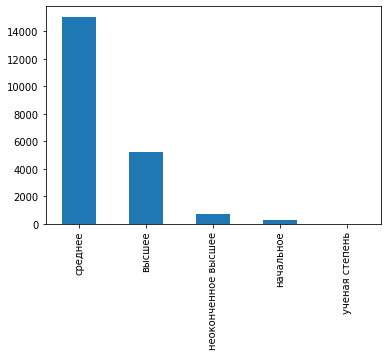

In [48]:
data['education'].value_counts().plot.bar()

**Вывод**

1. Заменили пустые значения трудового стажа на медианные значения
2. Привели трудовой стаж к единой единице измерения - дням
3. Пропуски в ежемесячных доходнах заполнили медианными значениями
4. Удалили записи с отрицательными значением количества детей в семье и количеством детей, равным 20
5. Удалили записи с нулевым возрастом работника
6. Удалили запись с непонятным значением пола
7. Привели к единому регистру написание уровня образования

### Замена типа данных

In [49]:
# Выводим актуальную информацию о типах
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21301 entries, 0 to 21524
Data columns (total 13 columns):
children            21301 non-null int64
days_employed       21301 non-null float64
dob_years           21301 non-null int64
education           21301 non-null object
education_id        21301 non-null int64
family_status       21301 non-null object
family_status_id    21301 non-null int64
gender              21301 non-null object
income_type         21301 non-null object
debt                21301 non-null int64
total_income        21301 non-null float64
purpose             21301 non-null object
years_employed      21301 non-null float64
dtypes: float64(3), int64(5), object(5)
memory usage: 2.3+ MB


In [50]:
# Приводим к целочисельному типу количество дней трудового стажа, общий доход, количество лет трудового стажа (расчетное поле)
data['days_employed'] = data['days_employed'].astype('int')
data['total_income'] = data['total_income'].astype('int')
data['years_employed'] = data['years_employed'].astype('int')

**Вывод**

Для удобства работы часть полей (количество дней трудового стажа, общий доход, количество лет трудового стажа (расчетное поле)) привели к целому типу данных

### Обработка дубликатов

Возможными причинами появления дубликатов может быть ошибки ручного ввода или импорта информации.

In [51]:
# Проверяем наличие дубликатов
print(f'Всего {len(data[data.duplicated()])} записей явных дублей ')

Всего 71 записей явных дублей 


In [52]:
# Удаляем дубли
data = data.drop_duplicates().reset_index(drop=True)

In [53]:
print(f'По итогу удаления дублей в датасете {len(data)} записей')

По итогу удаления дублей в датасете 21230 записей


**Вывод**

Удалили явные дубли в датасете

### Лемматизация

In [54]:
# проводим лемматизацию цели получения кредита
from pymystem3 import Mystem
m = Mystem() 

# Используем специальную библиотеку, коотрая выделяет леммы (словарные формы).
# Результат лемматизации является массивом. Для удобства склиеваем значения снова в строку
data['purpose_lemmas'] = data['purpose'].apply(lambda text: ' '.join(m.lemmatize(text)).replace('\n', ''))
data['purpose_lemmas'].head()

0                 покупка   жилье 
1       приобретение   автомобиль 
2                 покупка   жилье 
3    дополнительный   образование 
4               сыграть   свадьба 
Name: purpose_lemmas, dtype: object

In [55]:
# Распределение по целям получения кредита
data['purpose_lemmas'].value_counts()

автомобиль                                     961
свадьба                                        785
на   проведение   свадьба                      759
сыграть   свадьба                              755
операция   с   недвижимость                    669
покупка   коммерческий   недвижимость          655
покупка   жилье   для   сдача                  647
операция   с   коммерческий   недвижимость     643
операция   с   жилье                           641
покупка   жилье   для   семья                  636
жилье                                          635
покупка   жилье                                634
недвижимость                                   627
строительство   собственный   недвижимость     626
операция   со   свой   недвижимость            623
строительство   недвижимость                   619
покупка   свой   жилье                         618
строительство   жилой   недвижимость           617
покупка   недвижимость                         612
ремонт   жилье                 

**Вывод**

Выделили леммы цели получения кредита. Результат сохранили в отдельную колонку purpose_lemmas

### Категоризация данных

#### Возвраст работника
Возрастные периоды взрослого человека можно выделить на основе биологического возраста: https://ru.wikipedia.org/wiki/%D0%92%D0%BE%D0%B7%D1%80%D0%B0%D1%81%D1%82%D0%BD%D0%B0%D1%8F_%D0%BF%D0%B5%D1%80%D0%B8%D0%BE%D0%B4%D0%B8%D0%B7%D0%B0%D1%86%D0%B8%D1%8F

- Юношеский период
    - юноши: 17 — 21 год
    - девушки: 16 — 20 лет
- Зрелый возраст (1 период)
    - мужчины: 21—35 лет
    - женщины: 20—35 лет
- Зрелый возраст (2 период)
    - мужчины: 35—60 лет
    - женщины: 35—55 лет
- Пожилой возраст: 55/60—75 лет
- Старческий возраст: 75—90 лет
- Долгожители — 90 лет и более

In [56]:
# Функция преобразования возраста в годах в возрастную категорию с учетом пола
def get_dob_years_category(years, gender):
    # Мужчины
    if gender == 'M':
        if 17 <= years < 21:
            return 'Юношиский период'
        elif 21 <= years < 35:
            return 'Зрелый возраст (1 период)'
        elif 35 <= years < 60:
            return 'Зрелый возраст (2 период)'
        elif 60 <= years < 75:
            return 'Пожилой возраст'
        elif 75 <= years < 90:
            return 'Старческий возраст'
        elif years >= 90:
            return 'Долгожители'
    elif gender == 'F':
        if 16 <= years < 20:
            return 'Юношиский период'
        elif 20 <= years < 35:
            return 'Зрелый возраст (1 период)'
        elif 35 <= years < 55:
            return 'Зрелый возраст (2 период)'
        elif 55 <= years < 75:
            return 'Пожилой возраст'
        elif 75 <= years < 90:
            return 'Старческий возраст'
        elif years >= 90:
            return 'Долгожители'

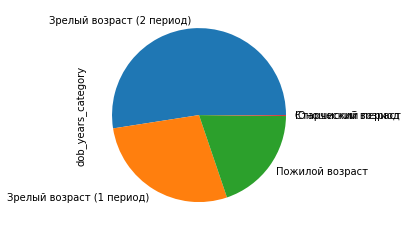

In [57]:
# Рассчитываем возврастную категорию
data['dob_years_category'] = data.apply(lambda row: get_dob_years_category(row['dob_years'], row['gender']), axis = 1)
data['dob_years_category'].value_counts().plot.pie()

#### Общий трудовой стаж
Можно придумать несколько категорий трудового стажа:
- без стажа работы
- до 5 лет
- 5 - 10 лет
- 10 - 20 лет
- более 20 лет


In [58]:
# Функция преобразования трудового стажа в годах категорию 
def get_employed_years_category(years):
    if years == 0:
        return 'Без стажа работы'
    elif 0 < years < 5:
        return 'до 5 лет'
    elif 5 <= years < 10:
        return 'до 10 лет'
    elif 10 <= years < 20:
        return 'до 20 лет'
    elif years >= 20:
        return 'более 20 лет'


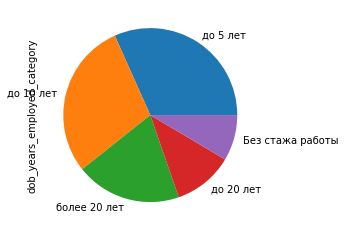

In [59]:
# Рассчитываем категорию трудового стажа
data['dob_years_employed_category'] = data.apply(lambda row: get_employed_years_category(row['years_employed']), axis = 1)
data['dob_years_employed_category'].value_counts().plot.pie()

#### Категории уровня дохода
- нет дохода
    - 0 тыс
- низкий
    - до 30 тыс
- средний
    - от 30 тыс до 60 тыс
- выше среднего
    - от 60 до 100 тыс
- высокий
    - от 100 тыс

In [60]:
# Функция преобразования трудового стажа в годах категорию 
def get_total_income_category(income):
    if income == 0:
        return 'нет дохода'
    elif 0 < income < 30000:
        return 'низкий'
    elif 30000 <= income < 60000:
        return 'средний'
    elif 60000 <= income < 100000:
        return 'выше среднего'
    elif income >= 100000:
        return 'высокий'

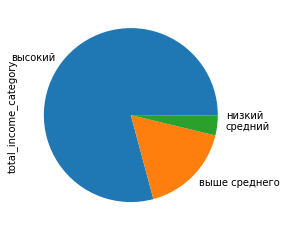

In [61]:
# Рассчитываем категорию трудового стажа
data['total_income_category'] = data.apply(lambda row: get_total_income_category(row['total_income']), axis = 1)
data['total_income_category'].value_counts().plot.pie()

#### Цели кредита

На основании лем, можно попытаться выделить болие общие категории целей кредита:
- автомобиль
- образование
- жилье/недвижимость
- свадьба
- ремонт

In [62]:
# Функция выделение категории цели кредита
def get_purpose_category(purpose):
    if 'ремонт' in purpose:
        return 'ремонт'
    elif 'автомобиль' in purpose:
        return 'автомобиль'
    elif 'образование' in purpose:
        return 'образование'
    elif 'жилье' in purpose:
        return 'недвижимость'
    elif 'недвижимость' in purpose:
        return 'недвижимость'
    elif 'свадьба' in purpose:
        return 'свадьба'

    else:
        return 'другое'

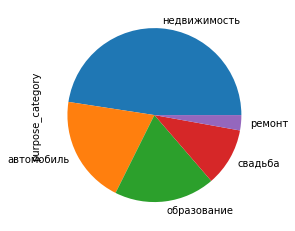

In [63]:
# Рассчитываем категорию цели кредита
data['purpose_category'] = data.apply(lambda row: get_purpose_category(row['purpose_lemmas']), axis = 1)
data['purpose_category'].value_counts().plot.pie()

**Вывод**

Ввели три категориальных значения для:
- возраста ребенка
- общего трудового стажа
- общего дохода

## Шаг 3. Поиск ответов на вопросы

- Есть ли зависимость между наличием детей и возвратом кредита в срок?

In [64]:
# Строим сводную таблицу
data_children_debt = data.pivot_table(index = 'children', columns='debt', values='total_income', aggfunc='count')
data_children_debt.rename(columns={0: 'no_debt', 1 : 'debt'}, inplace=True)
data_children_debt['debt_percent'] = data_children_debt['debt'] / (data_children_debt['no_debt'] + data_children_debt['debt'])
data_children_debt

debt,no_debt,debt,debt_percent
children,,,
0,12963.0,1058.0,0.075458
1,4351.0,441.0,0.092028
2,1845.0,194.0,0.095145
3,301.0,27.0,0.082317
4,37.0,4.0,0.097561
5,9.0,NaN,NaN


**Вывод**

Есть небольшой рост % должников, начиная с 1-го ребенка, но он не существенный.
В целом, зависимости между количеством детей и возвратом кредита не выявлено. 

- Есть ли зависимость между семейным положением и возвратом кредита в срок?

In [65]:
# Строим сводную таблицу
data_children_debt = data.pivot_table(index = 'family_status', columns='debt', values='total_income', aggfunc='count')
data_children_debt.rename(columns={0: 'no_debt', 1 : 'debt'}, inplace=True)
data_children_debt['debt_percent'] = data_children_debt['debt'] / (data_children_debt['no_debt'] + data_children_debt['debt'])
data_children_debt

debt,no_debt,debt,debt_percent
family_status,,,
Не женат / не замужем,2508,272,0.097842
в разводе,1095,84,0.071247
вдовец / вдова,884,62,0.065539
гражданский брак,3729,383,0.093142
женат / замужем,11290,923,0.075575


**Вывод**

Холостые заемщики, а также заемщики, находящиеся в гражданском браке, имеют больший % задолженности, нежели женатые. 

Наименший % задолженности - вдовцы/вдовы

- Есть ли зависимость между уровнем дохода и возвратом кредита в срок?

In [66]:
data_children_debt = data.pivot_table(index = 'total_income_category', columns='debt', values='family_status', aggfunc='count')
data_children_debt.rename(columns={0: 'no_debt', 1 : 'debt'}, inplace=True)
data_children_debt['debt_percent'] = data_children_debt['debt'] / (data_children_debt['no_debt'] + data_children_debt['debt'])
data_children_debt

debt,no_debt,debt,debt_percent
total_income_category,,,
высокий,15438,1371,0.081563
выше среднего,3320,304,0.083885
низкий,20,2,0.090909
средний,728,47,0.060645


**Вывод**

Наименьший процент задолженности у людей со средним уровнем доходов (30-60 тыс руб.) 

В остальных категориях отличия не существенные. Зависимости не выявлено

- Как разные цели кредита влияют на его возврат в срок?

In [67]:
data_children_debt = data.pivot_table(index = 'purpose_category', columns='debt', values='family_status', aggfunc='count')
data_children_debt.rename(columns={0: 'no_debt', 1 : 'debt'}, inplace=True)
data_children_debt['debt_percent'] = data_children_debt['debt'] / (data_children_debt['no_debt'] + data_children_debt['debt'])
data_children_debt

debt,no_debt,debt,debt_percent
purpose_category,,,
автомобиль,3861,397,0.093236
недвижимость,9359,742,0.073458
образование,3601,369,0.092947
ремонт,567,35,0.058140
свадьба,2118,181,0.078730


**Вывод**

Цели кредита практически не влияют на возможную задолженность платежей. Зависимости не выявлено

## Шаг 4. Общий вывод

Провели преодобработку данных (заполнили пропуски, удалил дубли, разобрались с некорректными значениями в данных)
Провели общий анализ данных, в т.ч. графически.

Проанализировано влияние нескольких факторов на возникновении задолженности платежа кредита:
- количество детей
- семейное положение
- уровень дохода
- цели кредита

Наиболее влияение оказывает семейное положение заемщика. Семьи-заемщики и вдовцы имееют наилучшие результаты.

Также можно отметить, что заемщики со средним уровнем дохода (30-60 тыс) имеют наилучшие срока платежей по кредиту